<a href="https://colab.research.google.com/github/Hosein-Ghojavand/Farsi-English-SMS-Spam-Detection/blob/main/Farsi_sms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hazm
!pip install emoji
!pip install URLExtract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 22.6 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=3c34e929498e92af29d2f76f2867eeeac0af6f0c876640a39a19fa0886f55fa3
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install arabic-reshaper
!pip install python-bidi

In [ ]:
# Standard Library Imports
import re
import warnings

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties

# Text Processing
import hazm
from hazm import *
from urlextract import URLExtract
import emoji
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from tqdm import tqdm

# Machine Learning - Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Suppressing Warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Files/final_dataset.csv", encoding='UTF-8')
df

,Text,Class
0,باید نهایتا ساعت ۶:۵۰ دقیقه از دم پل هوایی راه...,ham
1,قابل نداره جابجایی دوربین و تنظیم دستگاه دزدگی...,ham
2,سلام آقا مهدی من امشب هم نمیتونم بیام ، کلاس د...,ham
3,۳۰۰ هزار تومن تخفیف اولین استفاده از سرویس «اس...,spam
4,آفرVIPدبی6900 استانبول4800 ⭕تفلیس4800 ✅آنتالیا...,spam
...,...,...
1093,وارد بازارکار شو دوره کارآموزی آنلاین ورایگان ...,spam
1094,"""2 میلیون تخفیف کاشت مو،ابرو"" 🔷با رعایت پروتکل...",spam
1095,۳ برابر شانس بیشتر با خرید شارژ 💥 فقط امروز دو...,spam
1096,ایرانسلی عزیز 💛، بدون پرداخت هزینه آنی مکالمه ...,spam


In [ ]:
df.shape

(1098, 2)

In [ ]:
# Check for duplicates and remove them if found
if df.duplicated().sum() > 0:
    print("Found duplicate rows. Removing them...")
    df = df.drop_duplicates()

In [ ]:
# Check for missing values
missing_values = df.isna().sum()
if missing_values.any():
    print("Found missing values. Removing them...")
    df = df.dropna()

Found missing values. Removing them...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 0 to 1097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1096 non-null   object
 1   Class   1096 non-null   object
dtypes: object(2)
memory usage: 25.7+ KB


In [ ]:
# adding some usfule columns to the dataset

# number of words in a message
df['NO_words'] = df['Text'].apply(lambda x:len(hazm.word_tokenize(x)))

# number of characters in a message
df['NO_characters'] = df['Text'].apply(len)

# number of sentence in message
df['NO_sentences'] = df['Text'].apply(lambda x:len(hazm.sent_tokenize(x)))

# number of emojis in sentece
df['NO_emojis'] = df['Text'].apply(lambda x: emoji.emoji_count(x))

In [ ]:
df.head()

,Text,Class,NO_words,NO_characters,NO_sentences,NO_emojis
0,باید نهایتا ساعت ۶:۵۰ دقیقه از دم پل هوایی راه...,ham,12,60,1,1
1,قابل نداره جابجایی دوربین و تنظیم دستگاه دزدگی...,ham,11,58,1,0
2,سلام آقا مهدی من امشب هم نمیتونم بیام ، کلاس د...,ham,20,89,3,1
3,۳۰۰ هزار تومن تخفیف اولین استفاده از سرویس «اس...,spam,55,225,3,0
4,آفرVIPدبی6900 استانبول4800 ⭕تفلیس4800 ✅آنتالیا...,spam,11,70,1,2


In [ ]:
# Descriptive statistics of text features
df.describe()

,NO_words,NO_characters,NO_sentences,NO_emojis
count,1096.000000,1096.000000,1096.000000,1096.000000
mean,30.826642,131.635949,1.565693,0.632299
std,22.730284,97.115643,0.854358,1.634339
min,1.000000,3.000000,1.000000,0.000000
25%,13.000000,65.000000,1.000000,0.000000
50%,22.000000,97.500000,1.000000,0.000000
75%,46.000000,187.250000,2.000000,0.000000
max,114.000000,537.000000,5.000000,18.000000


In [ ]:
# Descriptive statistics of text features for HAM messages
df[df['Class'] == "ham"][['NO_characters', 'NO_words', 'NO_sentences', 'NO_emojis']].describe()

,NO_characters,NO_words,NO_sentences,NO_emojis
count,459.000000,459.00000,459.000000,459.000000
mean,101.283224,22.72549,1.403050,0.102397
std,97.090436,21.89701,0.793582,0.901463
min,3.000000,1.00000,1.000000,0.000000
25%,39.500000,9.00000,1.000000,0.000000
50%,68.000000,15.00000,1.000000,0.000000
75%,124.500000,28.00000,2.000000,0.000000
max,537.000000,114.00000,5.000000,18.000000


In [ ]:
# Descriptive statistics of text features for SPAM messages
df[df['Class'] == "spam"][['NO_characters', 'NO_words', 'NO_sentences', 'NO_emojis']].describe()

,NO_characters,NO_words,NO_sentences,NO_emojis
count,637.000000,637.000000,637.000000,637.000000
mean,153.507064,36.664050,1.682889,1.014129
std,91.136234,21.511958,0.877697,1.914391
min,35.000000,7.000000,1.000000,0.000000
25%,69.000000,17.000000,1.000000,0.000000
50%,132.000000,33.000000,1.000000,0.000000
75%,209.000000,52.000000,2.000000,1.000000
max,507.000000,111.000000,5.000000,15.000000


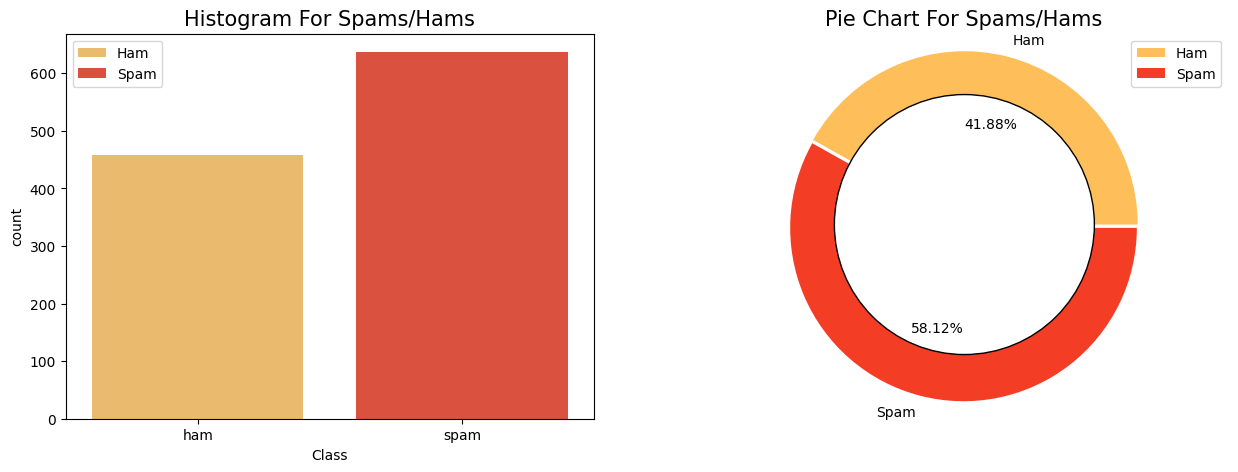

In [ ]:
# Calculate number of each class (ham or spam)
spam_count = df['Class'].value_counts()['spam']
ham_count = df['Class'].value_counts()['ham']

# Plotting
labels = ['Ham', 'Spam']
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Class', hue='Class', alpha=1)
plt.legend(labels)
plt.title('Histogram For Spams/Hams', size=15)

# Pie Chart
plt.subplot(1, 2, 2)
sizes = [ham_count, spam_count]
explode = [0, 0.02]
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart For Spams/Hams', size=15)
plt.show()


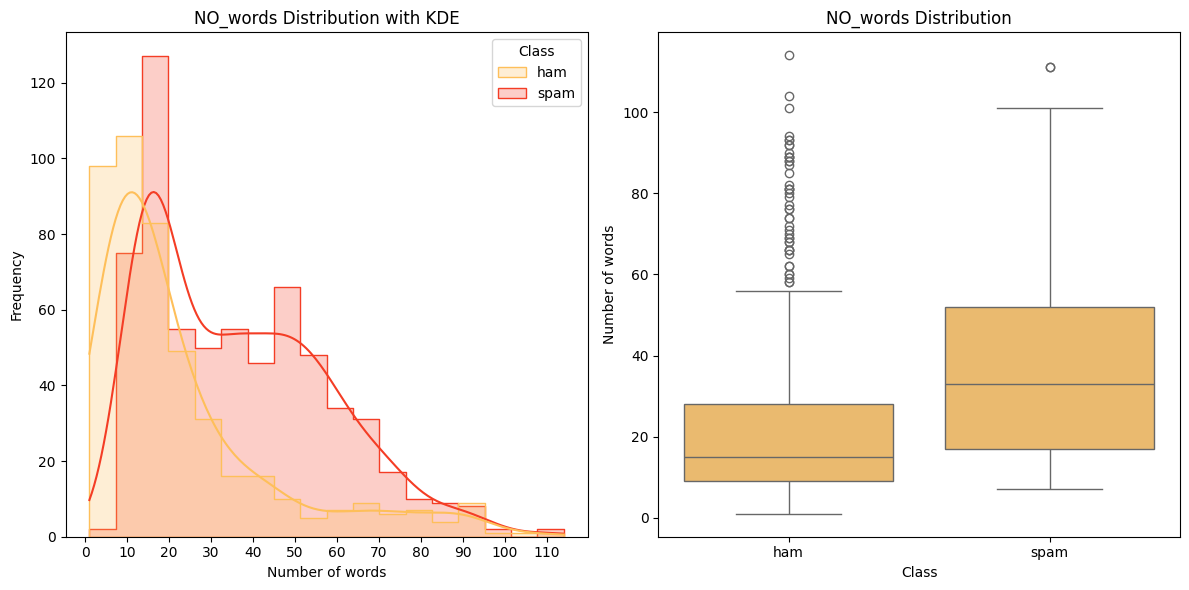

In [ ]:
plt.figure(figsize=(12, 6))

# Define the red palette
red_palette = sns.color_palette("YlOrRd", 2)

# First subplot
plt.subplot(1, 2, 1)
sns.set_palette(red_palette)
sns.histplot(data=df, x='NO_words', hue='Class', kde=True, element='step')
plt.title('NO_words Distribution with KDE')
plt.xticks(range(0, df['NO_words'].max() + 1, 10))  # Adjust the step size as needed
plt.xlabel('Number of words')
plt.ylabel('Frequency')

# Second subplot
plt.subplot(1, 2, 2)
sns.set_palette(red_palette)
sns.boxplot(x='Class', y='NO_words', data=df)
plt.title('NO_words Distribution')
plt.xlabel('Class')
plt.ylabel('Number of words')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

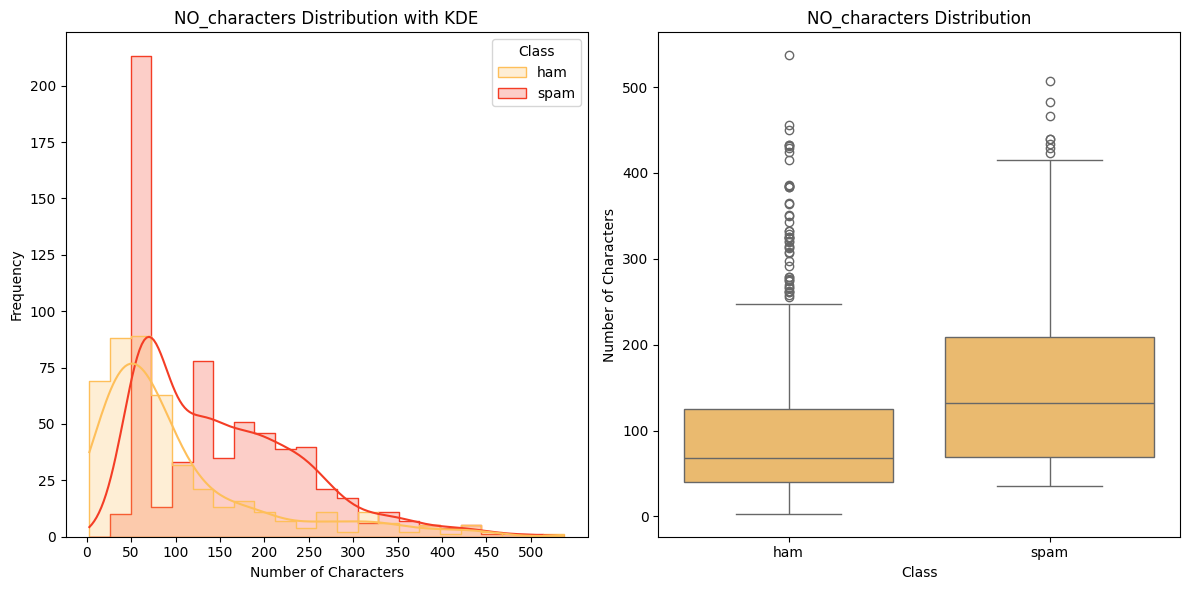

In [ ]:
plt.figure(figsize=(12, 6))

# Define the red palette
red_palette = sns.color_palette("YlOrRd", 2)

# First subplot
plt.subplot(1, 2, 1)
sns.set_palette(red_palette)
sns.histplot(data=df, x='NO_characters', hue='Class', kde=True, element='step')
plt.title('NO_characters Distribution with KDE')
plt.xticks(range(0, df['NO_characters'].max() + 1, 50))  # Adjust the step size as needed
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Second subplot
plt.subplot(1, 2, 2)
sns.set_palette(red_palette)
sns.boxplot(x='Class', y='NO_characters', data=df)
plt.title('NO_characters Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Characters')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

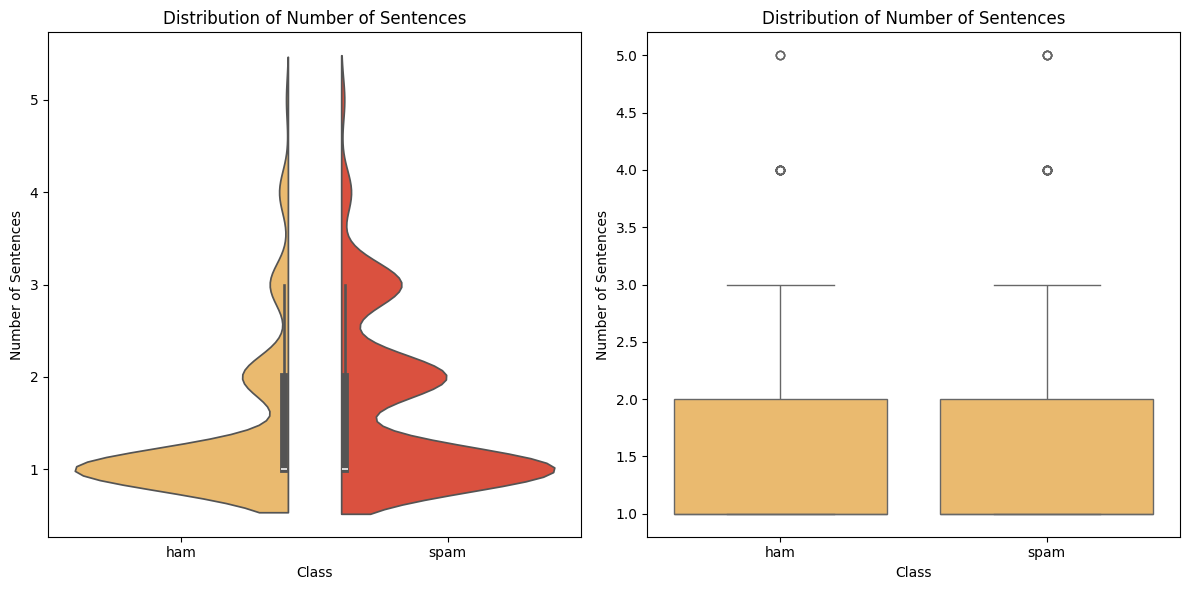

In [ ]:

plt.figure(figsize=(12, 6))

# Define the red palette
red_palette = sns.color_palette("YlOrRd", 2)

# First subplot - Violin Plot
plt.subplot(1, 2, 1)
sns.set_palette(red_palette)
sns.violinplot(data=df, x='Class', y='NO_sentences', hue='Class', split=True)
plt.title('Distribution of Number of Sentences')
plt.xlabel('Class')
plt.ylabel('Number of Sentences')

# Second subplot - Box Plot
plt.subplot(1, 2, 2)
sns.set_palette(red_palette)
sns.boxplot(x='Class', y='NO_sentences', data=df)
plt.title('Distribution of Number of Sentences')
plt.xlabel('Class')
plt.ylabel('Number of Sentences')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

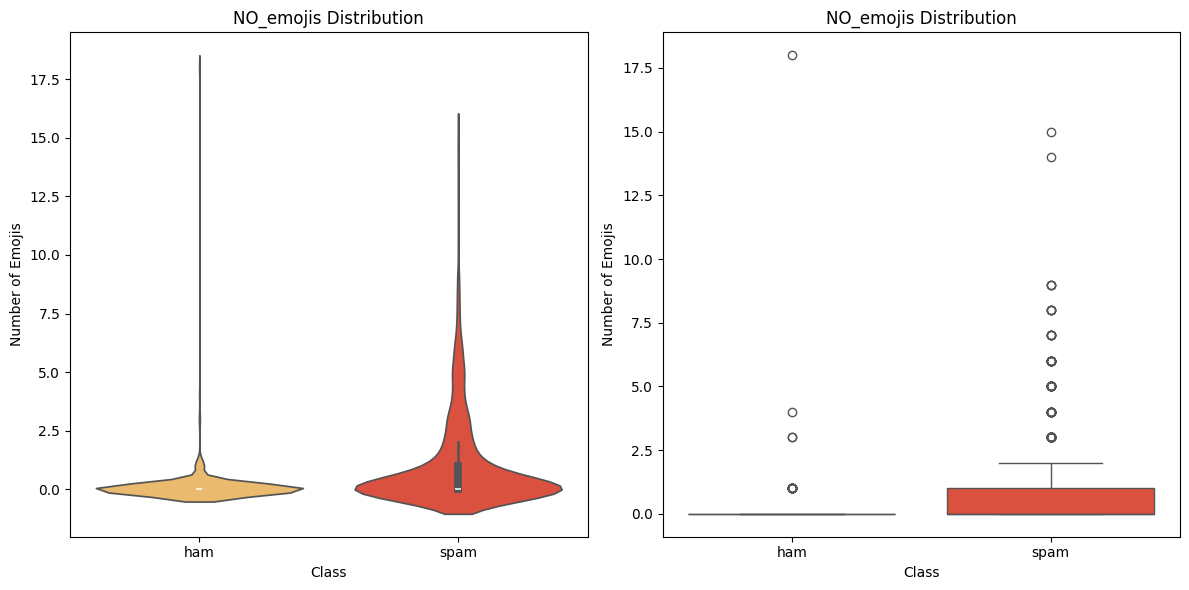

In [ ]:
plt.figure(figsize=(12, 6))

# Subplot for emoji distribution using violin plot
plt.subplot(1, 2, 1)
sns.violinplot(x='Class', y='NO_emojis', data=df, palette=red_palette)
plt.title('NO_emojis Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Emojis')

# Subplot for emoji distribution by class using box plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='NO_emojis', data=df, palette=red_palette)
plt.title('NO_emojis Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Emojis')

plt.tight_layout()
plt.show()



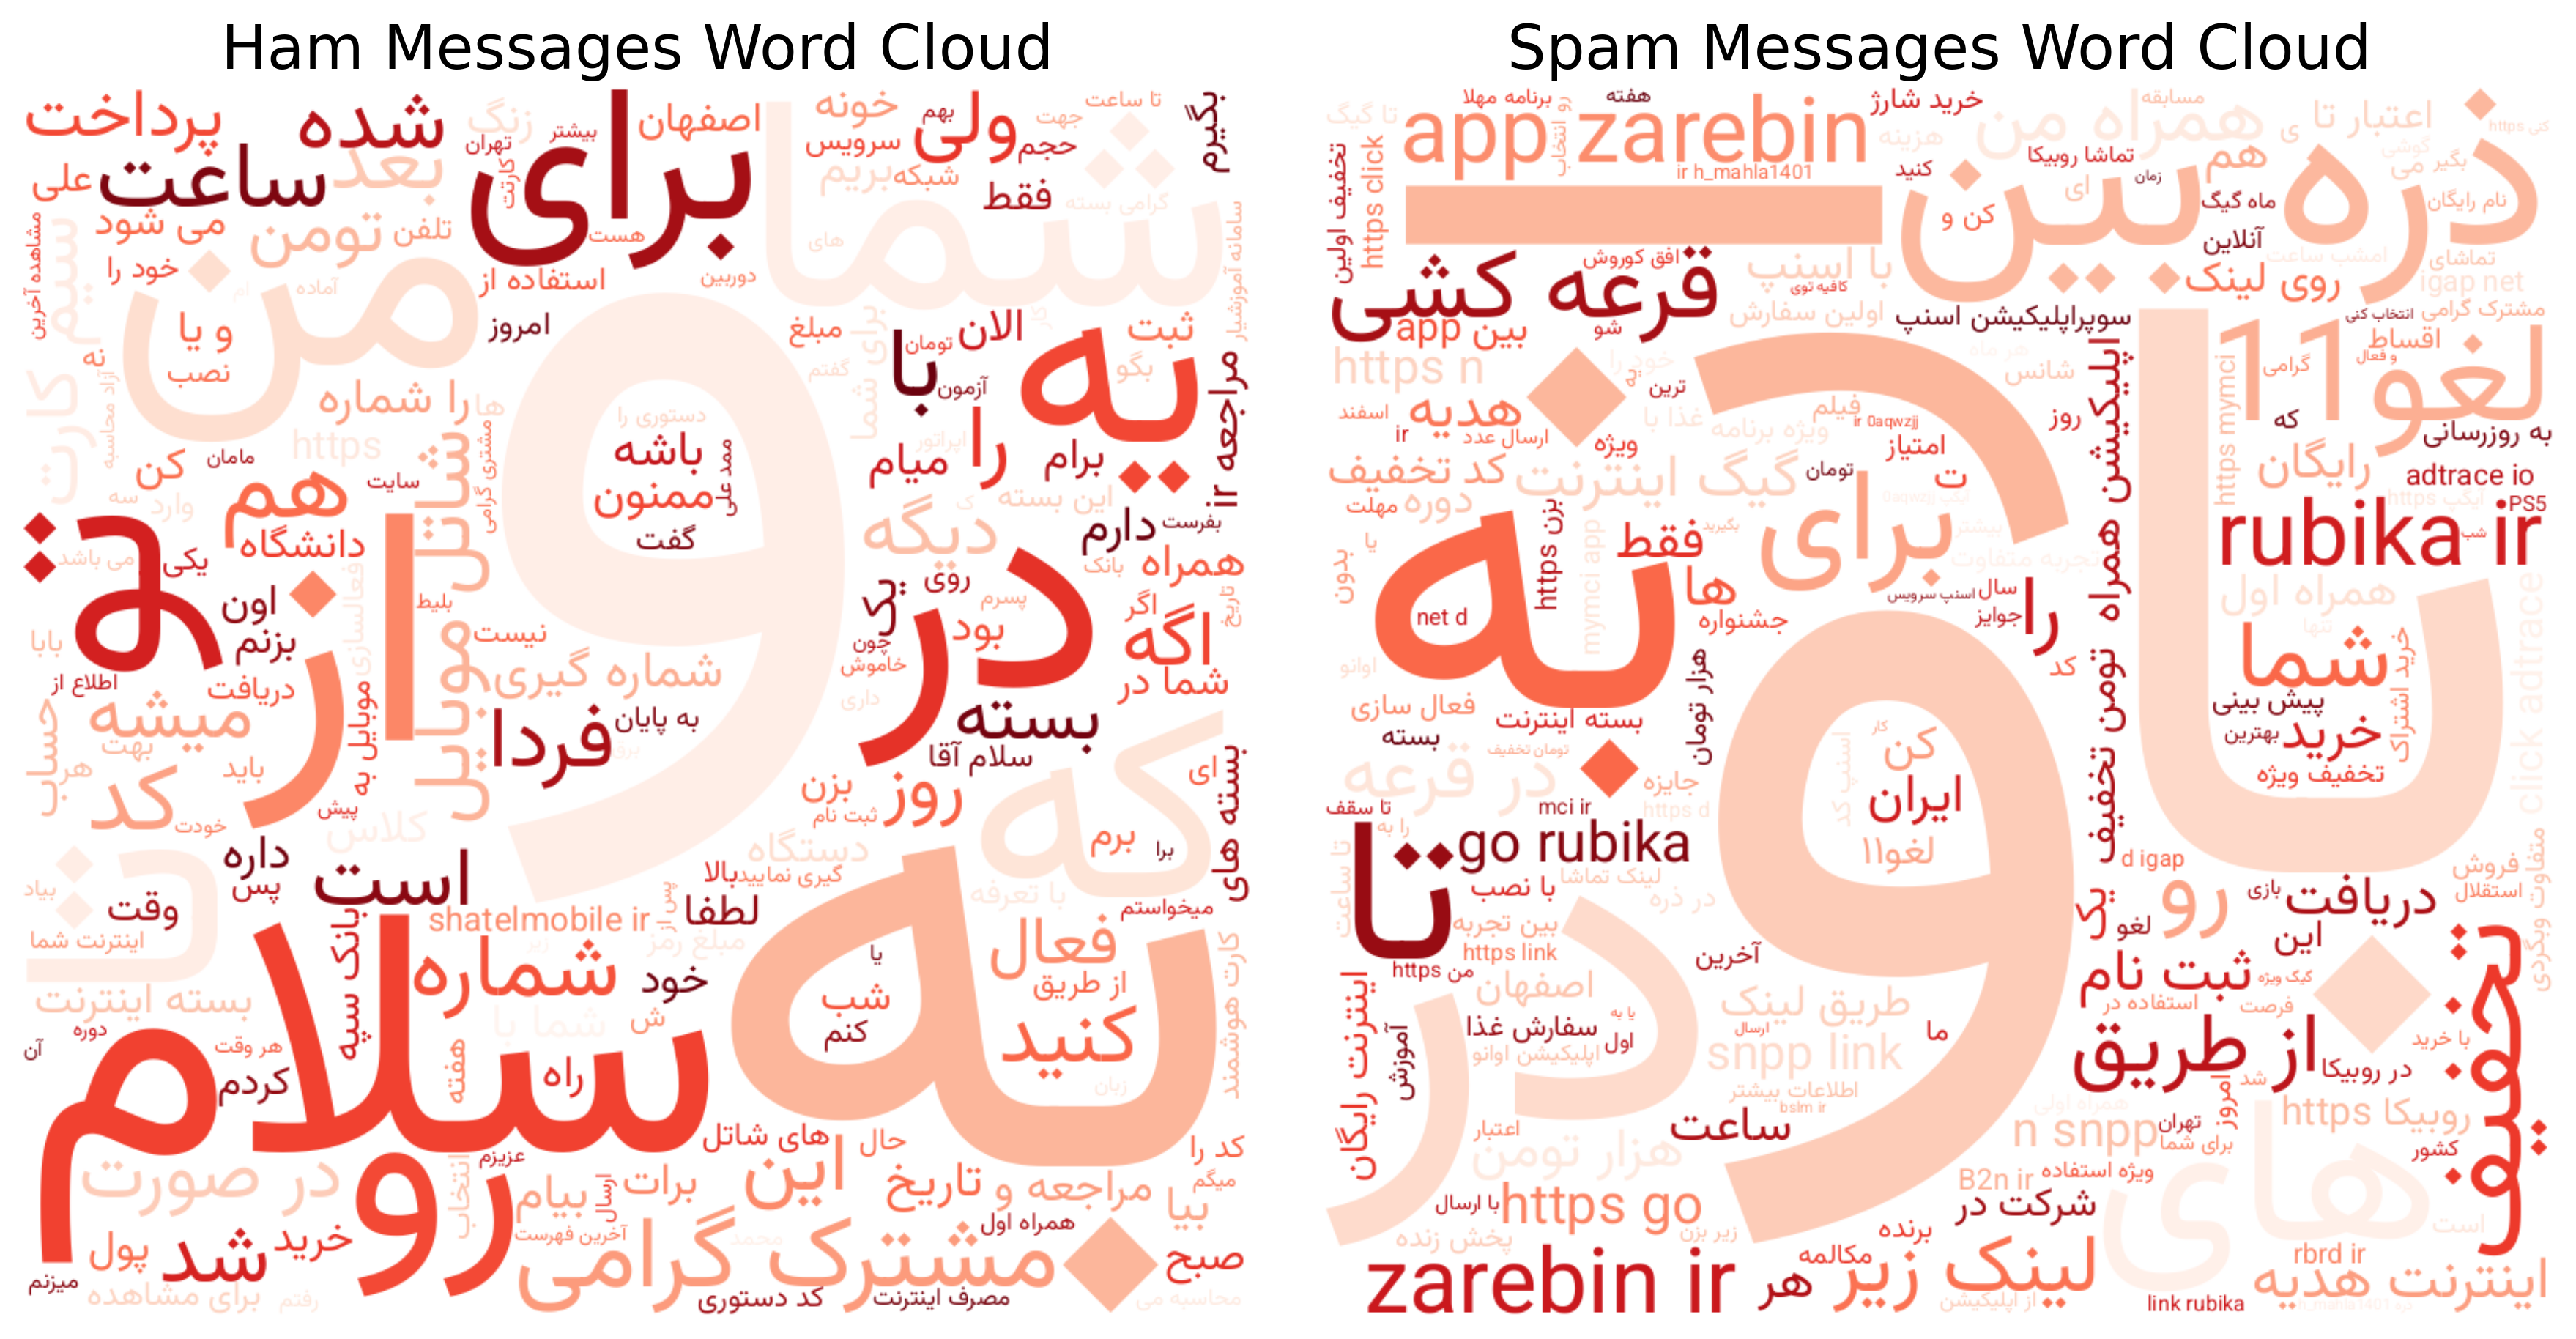

In [ ]:
red_palette_c = sns.color_palette("Reds_r", as_cmap=True)

ham_text = " ".join(df[df['Class'] == "ham"]['Text'].astype(str))
spam_text = " ".join(df[df['Class'] == "spam"]['Text'].astype(str))

font_path ="/content/drive/MyDrive/NLP Files/Vazirmatn-VariableFont_wght.ttf"
ham_wordcloud = WordCloud(width=800, height=800, background_color='white', colormap=red_palette_c, font_path=font_path).generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=800, background_color='white', colormap=red_palette_c, font_path=font_path).generate(spam_text)

ham_image = ham_wordcloud.to_array()
spam_image = spam_wordcloud.to_array()

plt.figure(figsize=(12, 6), dpi=300)

plt.subplot(1, 2, 1)
plt.imshow(ham_image, interpolation='bilinear')
plt.title('Ham Messages Word Cloud', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_image, interpolation='bilinear')
plt.title('Spam Messages Word Cloud', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


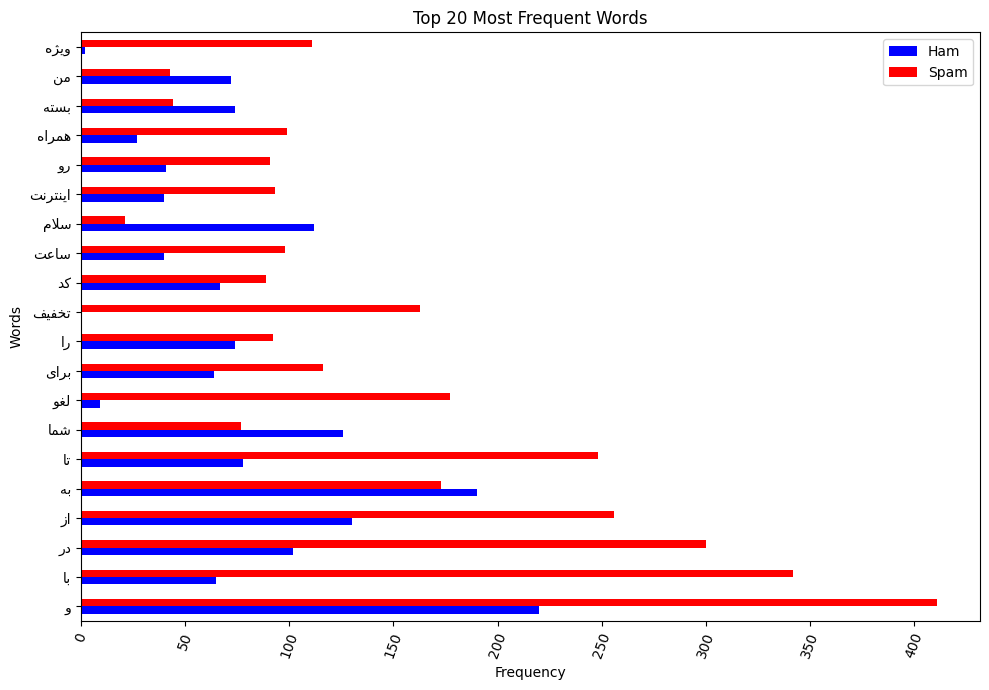

In [ ]:
# Function to clean and tokenize the text
def clean_and_tokenize(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)
    unwanted_patterns = r'[\/:?\.\،\؛!«»؟]|^\d+$|^(https?|ir)$'
    tokens = [token for token in tokens if not re.match(unwanted_patterns, token)]
    return tokens

# Prepare and clean text
ham_text = " ".join(df[df['Class'] == "ham"]['Text'].astype(str))
spam_text = " ".join(df[df['Class'] == "spam"]['Text'].astype(str))
ham_words = clean_and_tokenize(ham_text)
spam_words = clean_and_tokenize(spam_text)

# Calculate term frequency and combine into a single DataFrame
ham_word_counts = pd.Series(ham_words).value_counts()
spam_word_counts = pd.Series(spam_words).value_counts()
combined_word_counts = pd.DataFrame({'Ham': ham_word_counts, 'Spam': spam_word_counts}).fillna(0)

# Calculate the total frequency for sorting
combined_word_counts['Total'] = combined_word_counts.sum(axis=1)

# Sort the DataFrame by total frequency
combined_word_counts = combined_word_counts.sort_values(by='Total', ascending=False)

# Get the top 20 most frequent words
top_words = combined_word_counts.head(20)

# Drop the 'Total' column after sorting
top_words = top_words.drop(columns='Total')

# Reshape and display Farsi text
reshaped_labels = [get_display(reshape(label)) for label in top_words.index]

# Plot term frequency bar chart for the top 20 most frequent words
fig, ax = plt.subplots(figsize=(10, 7))

top_words.plot(kind='barh', ax=ax, color=['blue', 'red'])
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.xticks(rotation=70, ha='center')

# Apply reshaped Farsi labels to the y-axis ticks
ax.set_yticklabels(reshaped_labels)

plt.tight_layout()
plt.show()



as you can see the most freqyency words are the mostly stopwords

# Preprocecing


here I have difined 8 functions, each one for a task.

In [ ]:
def remove_urls(text):
    """Replaces URLs in the text with <URL>."""
    extractor = URLExtract()
    urls = extractor.find_urls(text)
    for url in urls:
        text = text.replace(url, "<URL>")
    return text

def normalize_text(text):
    """Normalizes the text using Hazm normalizer."""
    normalizer = Normalizer()
    return normalizer.normalize(text)

def convert_emojis(text):
    """Converts emojis to text descriptions using emoji library."""
    return emoji.demojize(text, language='fa')

def handle_punctuation(text):
    """Handles punctuation by removing unwanted characters."""
    unwanted_patterns = r'[\/:?\.\،\؛!«»؟]'
    return re.sub(unwanted_patterns, '', text)

def tokenize_text(text):
    """Tokenizes the text using Hazm word tokenizer."""
    tokenizer = word_tokenize
    return tokenizer(text)

def lemmatize_tokens(tokens):
    """Lemmatizes each token in the list."""
    lemmatizer = Lemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def remove_stopwords(tokens):
    """Removes stopwords from the list of tokens."""
    stopwords = stopwords_list()
    return [token for token in tokens if token not in stopwords]

def join_tokens(tokens):
    """Joins the list of tokens back into a sentence."""
    return ' '.join(tokens)

here I have difined a final function which uses previous functions

In [ ]:
# # Preprocess each step separately with progress bars
# tqdm.pandas()

# # Step 1: Remove URLs
# print("Removing URLs......")
# df['Text'] = df['Text'].progress_apply(remove_urls)
# df.to_csv('step1_removed_urls.csv', index=False)

# # Step 2: Normalize text
# print("Normalizing text.......")
# df['Text'] = df['Text'].progress_apply(normalize_text)
# df.to_csv('step2_normalized_text.csv', index=False)

# # Step 3: Convert emojis
# print("Converting emojis.......")
# df['Text'] = df['Text'].progress_apply(convert_emojis)
# df.to_csv('step3_converted_emojis.csv', index=False)

In [ ]:
# # Step 4: Handle punctuation
# print("Handling punctuation.......")
# df['Text'] = df['Text'].progress_apply(handle_punctuation)
# df.to_csv('step4_handled_punctuation.csv', index=False)

# # Step 5: Tokenize text
# print("Tokenizing text.......")
# df['Tokens'] = df['Text'].progress_apply(tokenize_text)
# df.to_csv('step5_tokenized_text.csv', index=False)

In [ ]:
# # Step 6: Lemmatize tokens
# print("Lemmatizing tokens.......")
# df['Tokens'] = df['Tokens'].progress_apply(lemmatize_tokens)
# df.to_csv('step6_lemmatized_tokens.csv', index=False)

# # Step 7: Remove stopwords
# print("Removing stopwords.......")
# df['Tokens'] = df['Tokens'].progress_apply(remove_stopwords)
# df.to_csv('step7_removed_stopwords.csv', index=False)

# # Step 8: Join tokens back into a sentence
# print("Joining tokens back into a sentence.......")
# df['Text'] = df['Tokens'].progress_apply(join_tokens)
# df.to_csv('/content/drive/MyDrive/NLP Files/final_preprocessed_dataset.csv', index=False)

# print("Preprocessing complete and saved at each step.")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Files/final_preprocessed_dataset.csv", encoding='UTF-8')

In [ ]:
df

,Text,Class,NO_words,NO_characters,NO_sentences,NO_emojis,Tokens
0,نهایتا ساعت ۶۵۰ دقیقه دم پل هوایی بیوفتیم بریم...,ham,12,60,1,1,"['نهایتا', 'ساعت', '۶۵۰', 'دقیقه', 'دم', 'پل',..."
1,نداره جابجایی دوربین تنظیم دستگاه دزدگیر ۳۵۰ ت...,ham,11,58,1,0,"['نداره', 'جابجایی', 'دوربین', 'تنظیم', 'دستگا..."
2,سلام آقا مهدی امشب نمیتونم بیا کلاس داشت#دار ش...,ham,20,89,3,1,"['سلام', 'آقا', 'مهدی', 'امشب', 'نمیتونم', 'بی..."
3,۳۰۰ هزار تومن تخفیف استفاده سرویس اسباب‌کشی اس...,spam,55,225,3,0,"['۳۰۰', 'هزار', 'تومن', 'تخفیف', 'استفاده', 'س..."
4,آفرVIPدبی ۶۹۰۰ استانبول ۴۸۰۰ دایره_قرمز_توخالی...,spam,11,70,1,2,"['آفرVIPدبی', '۶۹۰۰', 'استانبول', '۴۸۰۰', 'دای..."
...,...,...,...,...,...,...,...
1091,بازارکار شو دوره کارآموزی آنلاین ورایگان طراحی...,spam,14,67,1,0,"['بازارکار', 'شو', 'دوره', 'کارآموزی', 'آنلاین..."
1092,۲ میلیون تخفیف کاشت#کار مو ابرو لوزی_آبی_بزرگب...,spam,16,66,1,1,"['۲', 'میلیون', 'تخفیف', 'کاشت#کار', 'مو', 'اب..."
1093,۳ شانس خرید شارژ برخورد امروز دوشنبه ده هزار ت...,spam,52,216,1,3,"['۳', 'شانس', 'خرید', 'شارژ', 'برخورد', 'امروز..."
1094,ایرانسلی عزیز قلب_زرد پرداخت هزینه آنی مکالمه ...,spam,36,164,1,2,"['ایرانسلی', 'عزیز', 'قلب_زرد', 'پرداخت', 'هزی..."


In [ ]:
# Replace text labels 'ham' and 'spam' with 0 and 1 in the 'Class' column
df["Class"].replace({"ham": 0, "spam": 1}, inplace=True)

In [ ]:
# Text Vectorization using TF-IDF for the 'Text' Column
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['Text'])
Y = df["Class"]

In [ ]:
# Splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [ ]:
# Classifier models
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
nb = MultinomialNB()
dt = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression(solver='liblinear', penalty='l2')
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ada = AdaBoostClassifier(n_estimators=50, random_state=2)
bagging = BaggingClassifier(n_estimators=50, random_state=2)
et = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knn,
    'NB': nb,
    'DT': dt,
    'LR': lr,
    'RF': rf,
    'AdaBoost': ada,
    'Bagging': bagging,
    'ExtraTrees': et,
    'GBDT': gbdt,
    'XGB': xgb
}

In [ ]:
# Function to train classifiers and evaluate performance
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    return accuracy, precision, recall, f1, y_pred


For SVC
Accuracy: 0.95
Precision: 0.9609375
Recall: 0.9534883720930233
F1 Score: 0.9571984435797667


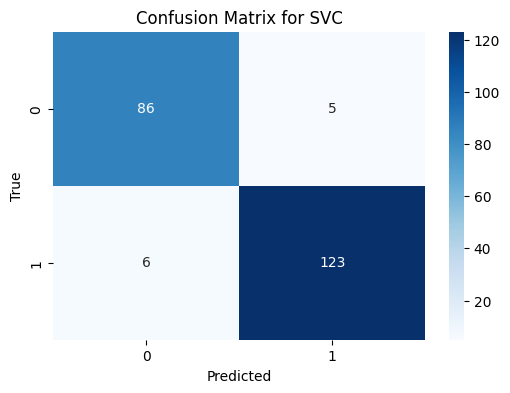


For KNN
Accuracy: 0.9318181818181818
Precision: 0.9384615384615385
Recall: 0.9457364341085271
F1 Score: 0.942084942084942


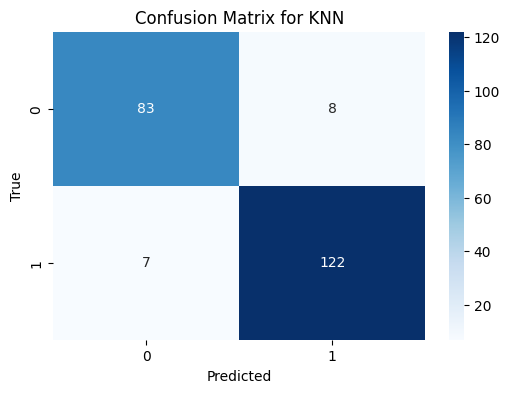


For NB
Accuracy: 0.9
Precision: 0.8741258741258742
Recall: 0.9689922480620154
F1 Score: 0.9191176470588236


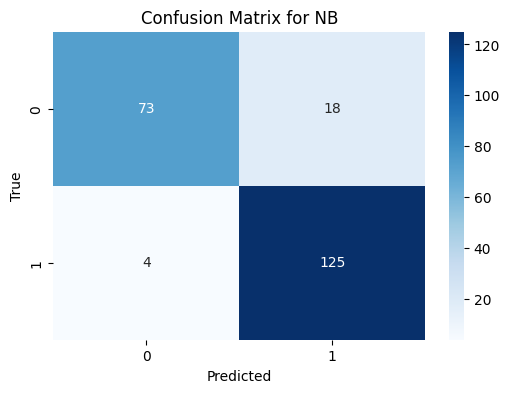


For DT
Accuracy: 0.8636363636363636
Precision: 0.9459459459459459
Recall: 0.813953488372093
F1 Score: 0.875


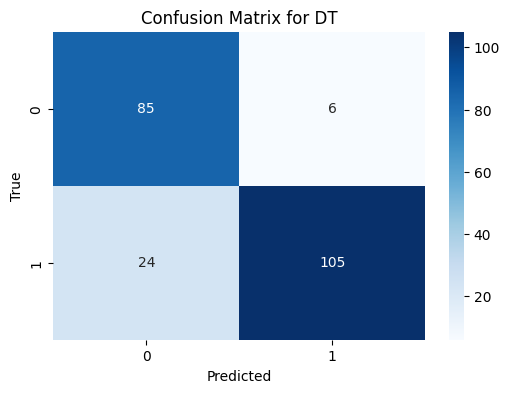


For LR
Accuracy: 0.9
Precision: 0.8741258741258742
Recall: 0.9689922480620154
F1 Score: 0.9191176470588236


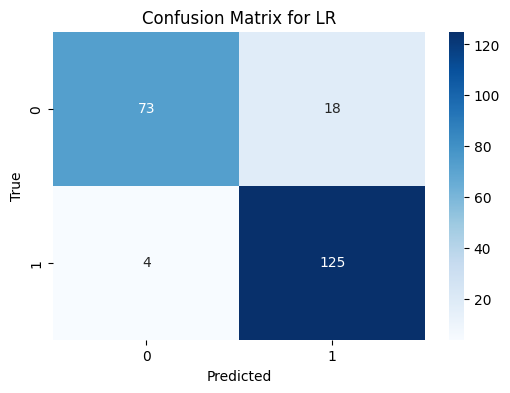


For RF
Accuracy: 0.9090909090909091
Precision: 0.9823008849557522
Recall: 0.8604651162790697
F1 Score: 0.9173553719008265


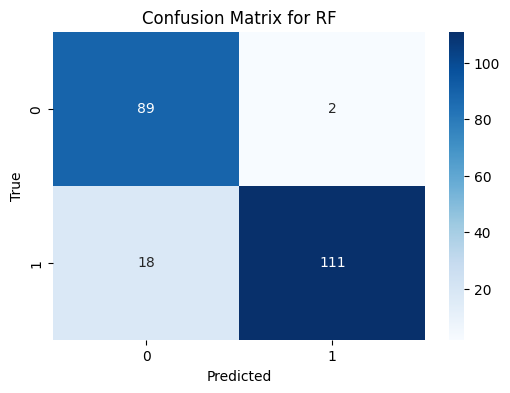


For AdaBoost
Accuracy: 0.8954545454545455
Precision: 0.9274193548387096
Recall: 0.8914728682170543
F1 Score: 0.9090909090909091


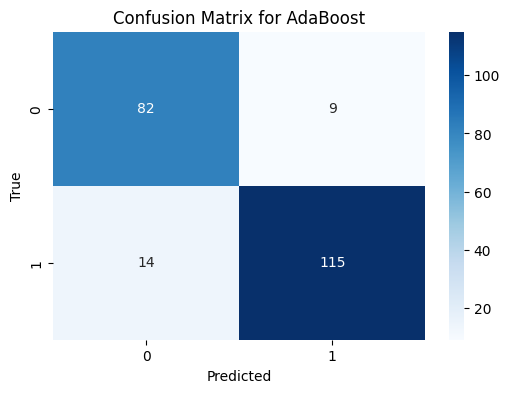


For Bagging
Accuracy: 0.9181818181818182
Precision: 0.9743589743589743
Recall: 0.8837209302325582
F1 Score: 0.9268292682926831


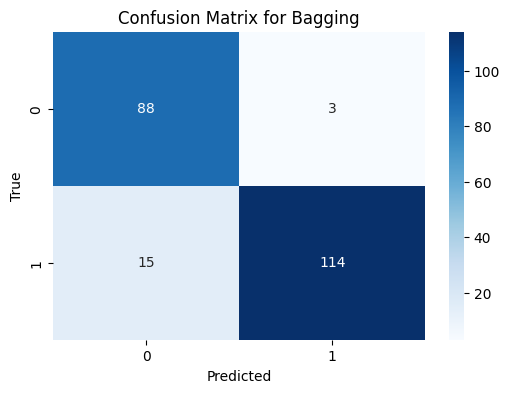


For ExtraTrees
Accuracy: 0.9272727272727272
Precision: 0.9747899159663865
Recall: 0.8992248062015504
F1 Score: 0.935483870967742


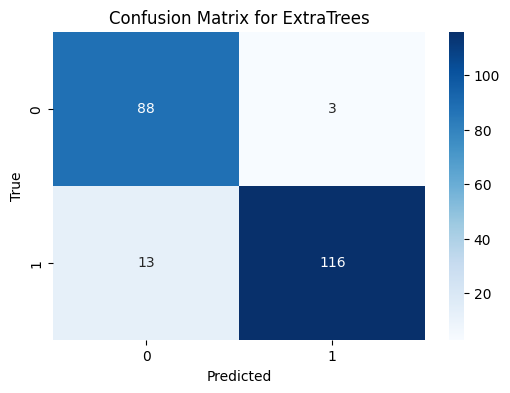


For GBDT
Accuracy: 0.8818181818181818
Precision: 0.963963963963964
Recall: 0.8294573643410853
F1 Score: 0.8916666666666667


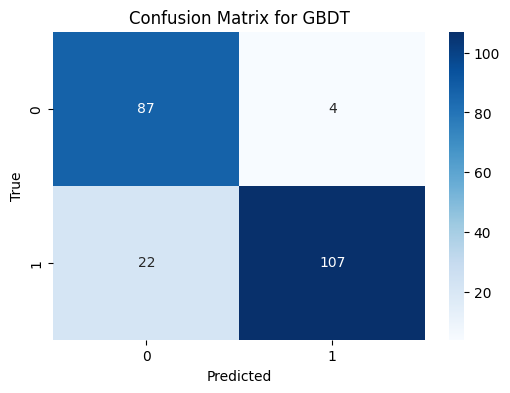


For XGB
Accuracy: 0.9227272727272727
Precision: 0.9666666666666667
Recall: 0.8992248062015504
F1 Score: 0.9317269076305221


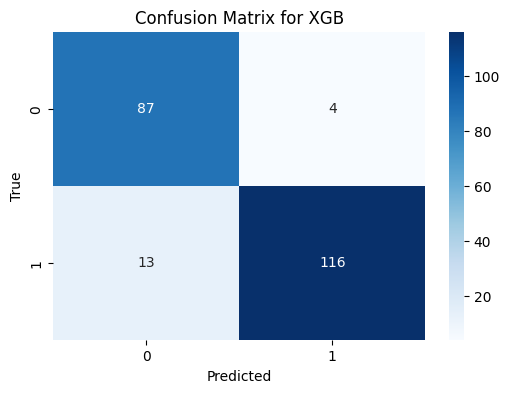

In [ ]:
# Lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train classifiers and store their performance
for name, clf in clfs.items():
    accuracy, precision, recall, f1, y_pred = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    print(f"\nFor {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Plot confusion matrix for each classifier
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
# Create a DataFrame to store and compare the accuracy, precision, recall, and F1 scores of the different algorithms
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

In [ ]:
# Sort the DataFrame by 'F1 Score' in descending order
performance_df = performance_df.sort_values('F1 Score', ascending=False)

# Reset the index to ensure it is sequential
performance_df = performance_df.reset_index(drop=True)

performance_df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,SVC,0.950000,0.960938,0.953488,0.957198
1,KNN,0.931818,0.938462,0.945736,0.942085
2,ExtraTrees,0.927273,0.974790,0.899225,0.935484
3,XGB,0.922727,0.966667,0.899225,0.931727
4,Bagging,0.918182,0.974359,0.883721,0.926829
5,NB,0.900000,0.874126,0.968992,0.919118
6,LR,0.900000,0.874126,0.968992,0.919118
7,RF,0.909091,0.982301,0.860465,0.917355
8,AdaBoost,0.895455,0.927419,0.891473,0.909091
9,GBDT,0.881818,0.963964,0.829457,0.891667


In [ ]:
# # checking through the performnace of all the models we have used and its very much amusing
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score

# # Create a Logistic Regression classifier with 'l2' penalty
# # clf = LogisticRegression(penalty='l1')

# accuracy_scores = []
# precision_scores = []

# for name, clf in clfs.items():
#     current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test )

#     print("\nFor ", name)
#     print("Accuracy - ", current_accuracy)
#     print("Precision - ", current_precision)

#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [ ]:
# #create a dataframe to store and compare the accuracy and precision of the different algorithm
# # Assuming clfs, accuracy_scores, and precision_scores are defined
# performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
# performance_df = performance_df.sort_values('Precision', ascending=False)

In [ ]:
# performance_df